<a href="https://colab.research.google.com/github/luongvantuit/learn-ai-with-python/blob/master/k-means/VD2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install python-mnist

In [2]:
import numpy as np
from mnist import MNIST
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# This function visualizes filters in matrix A. Each column of A is a
# filter. We will reshape each column into a square image and visualizes
# on each cell of the visualization panel.
# All other parameters are optional, usually you do not need to worry
# about it.
# opt_normalize: whether we need to normalize the filter so that all of
# them can have similar contrast. Default value is true.

In [4]:
# opt_graycolor: whether we use gray as the heat map. Default is true.
# opt_colmajor: you can switch convention to row major for A. In that
# case, each row of A is a filter. Default value is false.
# source: https://github.com/tsaith/ufldl_tutorial
def display_network(A, m = -1, n = -1):
  opt_normalize = True
  opt_graycolor = True
  # Rescale
  A = A - np.average(A)
  # Compute rows & cols
  (row, col) = A.shape
  sz = int(np.ceil(np.sqrt(row)))
  buf = 1
  if m < 0 or n < 0:
    n = np.ceil(np.sqrt(col))
    m = np.ceil(col / n)
  image = np.ones(shape=(buf + m * (sz + buf), buf + n * (sz + buf)))
  if not opt_graycolor:
    image *= 0.1
  k = 0
  for i in range(int(m)):
    for j in range(int(n)):
      if k >= col:
        continue
      clim = np.max(np.abs(A[:, k]))
      if opt_normalize:
        image[buf + i * (sz + buf):buf + i * (sz + buf) + sz, buf + j * (sz + buf):buf + j * (sz + buf) + sz] = \
            A[:, k].reshape(sz, sz) / clim
      else:
        image[buf + i * (sz + buf):buf + i * (sz + buf) + sz, buf + j * (sz + buf):buf + j * (sz + buf) + sz] = \
            A[:, k].reshape(sz, sz) / np.max(np.abs(A))
      k += 1
  return image

def display_color_network(A):
  """
  # display receptive field(s) or basis vector(s) for image patches
  #
  # A the basis, with patches as column vectors
  # In case the midpoint is not set at 0, we shift it dynamically
  :param A:
  :param file:
  :return:
  """
  if np.min(A) >= 0:
    A = A - np.mean(A)
  cols = np.round(np.sqrt(A.shape[1]))
  channel_size = A.shape[0] / 3
  dim = np.sqrt(channel_size)
  dimp = dim + 1

  rows = np.ceil(A.shape[1] / cols)
  B = A[0:channel_size, :]
  C = A[channel_size:2 * channel_size, :]
  D = A[2 * channel_size:3 * channel_size, :]
  B = B / np.max(np.abs(B))
  C = C / np.max(np.abs(C))
  D = D / np.max(np.abs(D))
  # Initialization of the image
  image = np.ones(shape=(dim * rows + rows - 1, dim * cols + cols - 1, 3))
  for i in range(int(rows)):
    for j in range(int(cols)):
      # This sets the patch
      image[i * dimp:i * dimp + dim, j * dimp:j * dimp + dim, 0] = B[:, i * cols + j].reshape(dim, dim)
      image[i * dimp:i * dimp + dim, j * dimp:j * dimp + dim, 1] = C[:, i * cols + j].reshape(dim, dim)
      image[i * dimp:i * dimp + dim, j * dimp:j * dimp + dim, 2] = D[:, i * cols + j].reshape(dim, dim)
      image = (image + 1) / 2
  return image

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
mndata = MNIST('/content/drive/My Drive/Machine Learning/Dataset/MNIST',gz=True)
mndata.load_testing()
X = mndata.test_images
X0 = np.asarray(X)[:1000,:]/256.0
X = X0
K = 10
kmeans = KMeans(n_clusters=K).fit(X)
pred_label = kmeans.predict(X)

<class 'numpy.ndarray'>
(784, 10)


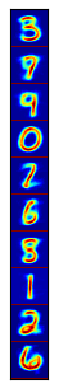

In [15]:
print(type(kmeans.cluster_centers_.T))
print(kmeans.cluster_centers_.T.shape)
A = display_network(kmeans.cluster_centers_.T, K, 1)
f1 = plt.imshow(A, interpolation='nearest', cmap = "jet")
f1.axes.get_xaxis().set_visible(False)
f1.axes.get_yaxis().set_visible(False)
plt.show()
# plt.savefig('a1.png', bbox_inches='tight')
# a colormap and a normalization instance
cmap = plt.cm.jet
norm = plt.Normalize(vmin=A.min(), vmax=A.max())
# map the normalized data to colors
# image is now RGBA (512x512x4)
image = cmap(norm(A))

In [17]:
N0 = 20;
X1 = np.zeros((N0*K, 784))
X2 = np.zeros((N0*K, 784))
for k in range(K):
  Xk = X0[pred_label == k, :]
  center_k = [kmeans.cluster_centers_[k]]
  neigh = NearestNeighbors(n_neighbors=N0).fit(Xk)
  dist, nearest_id = neigh.kneighbors(center_k, N0)
  X1[N0*k: N0*k + N0,:] = Xk[nearest_id, :]
  X2[N0*k: N0*k + N0,:] = Xk[:N0, :]

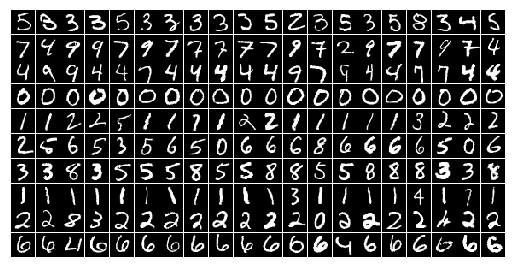

In [18]:
plt.axis('off')
A = display_network(X2.T, K, N0)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.show()